# Laboratoire 0 - Exemple

Bienvenue dans ce laboratoire d'exemple. L'objectif ici est de vous familiariser avec l'environnement Jupyter, ainsi que les interactions que vous pouvez avoir avec le robot.

Jupyter nous sert d'interface pour appeler du code python. Débutons 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from websocket_client import Robot, Sensors

/home/agariepy/Documents/lab-robotique/glo7021/.env/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Modifiez la valeur de `ip_robot` selon le robot qui vous a été assigné.

In [2]:
ip_robot = '10.248.0.32'
robot = Robot(ip_robot)

In [3]:
robot.connect()

In [4]:
robot.listen_to(Sensors.hokuyo)

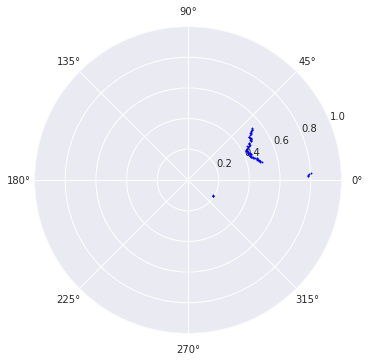

In [38]:
last_data = robot.read_sensor_data(Sensors.hokuyo)[0]['msg']
ranges = np.array(last_data['ranges'])
angles = np.arange(last_data['angle_min'], last_data['angle_max'] + last_data['angle_increment'], 
                   last_data['angle_increment'])

ranges = ranges.astype('float32')

ax = plt.subplot(1,1,1, polar=True)
ax.scatter(angles, ranges, color='b', s=2)
ax.grid(True)
ax.set_rmax(1.0)

plt.show()